In [44]:
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline
import numpy as np

import cv2

from skimage.io import imread
from skimage import color 

# images and idea: Christian Dullin

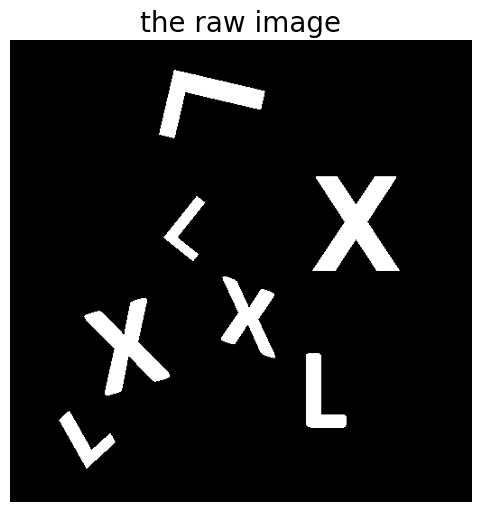

In [45]:
img = np.array(imread('example.png'))

plt.figure(figsize=(6,6))
plt.imshow(img,  cmap='gray')
plt.axis('off')
plt.title('the raw image', fontsize=20)
plt.show()

In [46]:
# calculation of the contours in the images

# cv.findContours(image, mode, method [, contours[, hierarchy[, offset]]])
#
# mode: cv2.RETR_LIST: retrieves all of the contours without establishing any hierarchical relationships. 
#
# method: cv2.CHAIN_APPROX_NONE: stores absolutely all the contour points. That is, any 2 
# subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neig
cont,hierarchy=cv2.findContours(img, cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

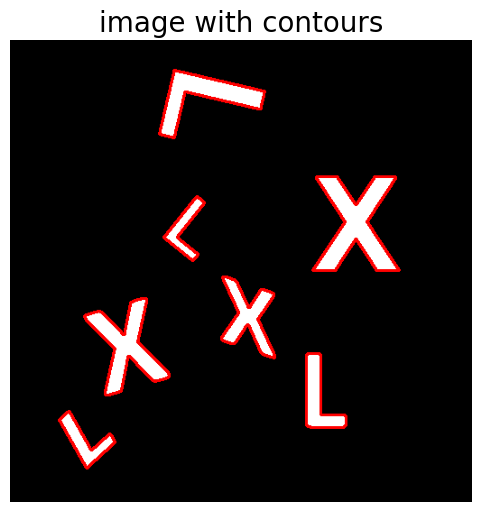

In [47]:
# create color image to draw contours
img_c = color.gray2rgb(img)

# cv.drawContours(image, contours, contourIdx, color, thickness)
# contourIdx: Parameter indicating a contour to draw. If negative, all the contours are drawn. 
image_plus = cv2.drawContours(img_c, cont, -1, (255,0,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(image_plus)
plt.axis('off')
plt.title('image with contours', fontsize=20)
plt.show()

In [48]:
# generation of an array for the fourier descriptors
FD = np.zeros([len(cont),100],dtype=complex)


# analyze all contours
for i in range(len(cont)):        
    
    # if we would need very good scale invariance
    # this would be the point to interpolate all 
    # contours so that they have the same length
    
    # interpret the contour as a complex number
    v=np.zeros([len(cont[i])],dtype=complex)   
    
    # convert each contour point into a complex number
    for j in range(0,len(cont[i])):
        v[j]=cont[i][:,0][j,0]  +1j*cont[i][:,0][j,1]
    
    # compute the actual Fourier descriptors, keep the first 100
    # we scale with the length of the contour, given by v.shape[0] -> some scale invariance
    FD[i,:]=np.fft.fft(v)[0:100]/v.shape[0]


In [49]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

# finally use KMeans to cluster the fourier descriptors
# Note: don't use the 0 order harmonic since it depends on the position of the object
# already a few harmonics are sufficient
# we use the absolute value of the complex fourier descriptors since the phase depends on the orientation of the object
# we scale with the length of the contour, given by v.shape[0] -> soem scale invariance
# we normalize the feature space
X=preprocessing.normalize(np.absolute(FD[:,1:5]))
kmeans=KMeans(n_clusters=2, n_init= 10).fit(X)

print(kmeans.labels_)

[0 0 1 1 0 1 0]


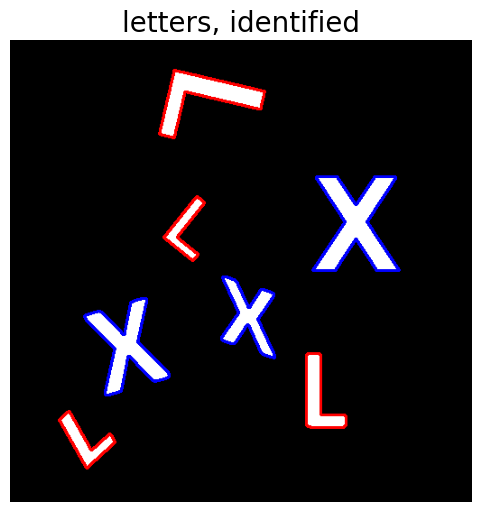

In [50]:
# show result of clustering
img_f = color.gray2rgb(img)
#loop through all of the contours
for i in range(len(cont)):
    red = 0
    blue = 0
    if kmeans.labels_[i] == 0:
        red =255
    if kmeans.labels_[i] == 1:
        blue =255
        
    img_f=cv2.drawContours(img_f,[cont[i]],0,(red,0,blue),2)
    
plt.figure(figsize=(6,6))
plt.imshow(img_f)
plt.axis('off')
plt.title('letters, identified', fontsize=20)
plt.show()    

## Exercise: identify all three types of letters in the next image

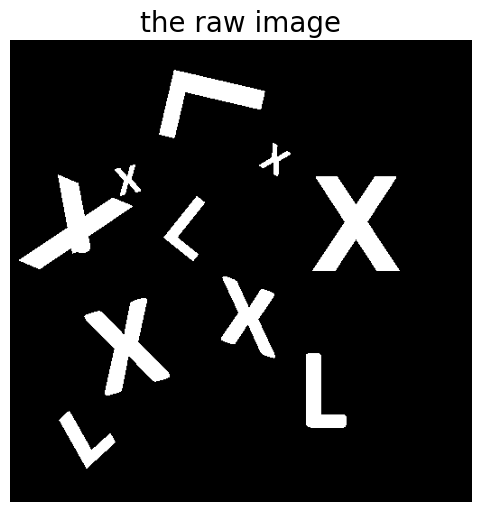

In [51]:
img = np.array(imread('example_1.png'))
plt.figure(figsize=(6,6))
plt.imshow(img,  cmap='gray')
plt.axis('off')
plt.title('the raw image', fontsize=20)
plt.show()

In [52]:
# calculation of the contours in the images

# cv.findContours(image, mode, method [, contours[, hierarchy[, offset]]])
#
# mode: cv2.RETR_LIST: retrieves all of the contours without establishing any hierarchical relationships. 
#
# method: cv2.CHAIN_APPROX_NONE: stores absolutely all the contour points. That is, any 2 
# subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neig
cont,hierarchy=cv2.findContours(img, cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

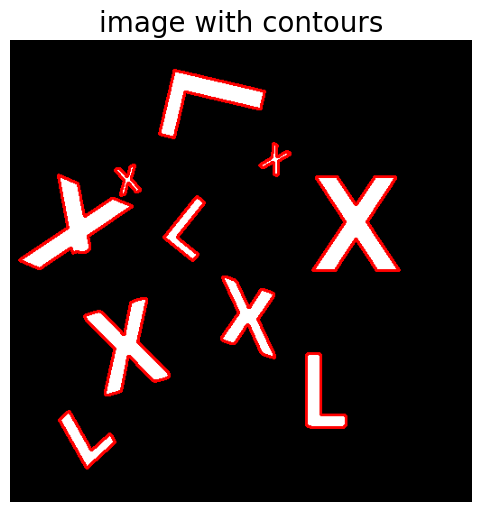

In [53]:
# create color image to draw contours
img_c = color.gray2rgb(img)

# cv.drawContours(image, contours, contourIdx, color, thickness)
# contourIdx: Parameter indicating a contour to draw. If negative, all the contours are drawn. 
image_plus = cv2.drawContours(img_c, cont, -1, (255,0,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(image_plus)
plt.axis('off')
plt.title('image with contours', fontsize=20)
plt.show()

In [54]:
# generation of an array for the fourier descriptors
FD = np.zeros([len(cont),100],dtype=complex)


# analyze all contours
for i in range(len(cont)):        
    
    # if we would need very good scale invariance
    # this would be the point to interpolate all 
    # contours so that they have the same length
    
    # interpret the contour as a complex number
    v=np.zeros([len(cont[i])],dtype=complex)   
    
    # convert each contour point into a complex number
    for j in range(0,len(cont[i])):
        v[j]=cont[i][:,0][j,0]  +1j*cont[i][:,0][j,1]
    
    # compute the actual Fourier descriptors, keep the first 100
    # we scale with the length of the contour, given by v.shape[0] -> some scale invariance
    FD[i,:]=np.fft.fft(v)[0:100]/v.shape[0]


In [55]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

# finally use KMeans to cluster the fourier descriptors
# Note: don't use the 0 order harmonic since it depends on the position of the object
# already a few harmonics are sufficient
# we use the absolute value of the complex fourier descriptors since the phase depends on the orientation of the object
# we scale with the length of the contour, given by v.shape[0] -> soem scale invariance
# we normalize the feature space
X=preprocessing.normalize(np.absolute(FD[:,1:5]))
kmeans=KMeans(n_clusters=3, n_init= 10).fit(X)

print(kmeans.labels_)

[1 1 0 0 1 0 2 0 0 1]


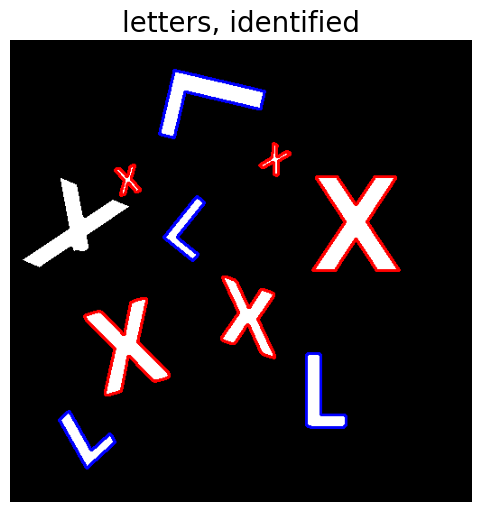

In [56]:
# show result of clustering
img_f = color.gray2rgb(img)
#loop through all of the contours
for i in range(len(cont)):
    red = 0
    blue = 0
    green = 0
    if kmeans.labels_[i] == 0:
        red =255
    if kmeans.labels_[i] == 1:
        blue =255
    if kmeans.labels_[i] == 2:
        green =255
        
    img_f=cv2.drawContours(img_f,[cont[i]],0,(red,0,blue),2)
    
plt.figure(figsize=(6,6))
plt.imshow(img_f)
plt.axis('off')
plt.title('letters, identified', fontsize=20)
plt.show()    